# Most Dangerous Driving Conditions for Summer in the U.S.
## Preparing My Tools

In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math

# picking up color palettes i'm interested in for my graphs
muted_earth = ['#8e768a', '#bfb5b2', '#c7bbc9', '#83adb5', '#57666a']
traffic_ontheroad = ['#a33636', '#fbf5e2', '#b0d0ca', '#9cb2ba', '#555363']
copper_gradient = ['#53bfa4', '#7dbf88', '#9aa078', '#b8835b', '#d68335']
bold_chic = ['#fffdfd', '#0f1113', '#f21589', '#57ad11', '#aaaaaa']
plain_jane = ['#d1d6a6', '#589e1e', '#752c58', '#4d4541', '#ff324c']
kbtg = ['#006c95', '#004c50', '#e1001e', '#488587', '#70d0d4']
earth_core = ['#818b75', '#a79280', '#b29c80', '#dbcbb7', '#e5e3db']
simple_earthy = ['#718e88', '#d3dadb', '#cdc1c5', '#b89694', '#964613']
distri_earth = ['#9e9580', '#cfbb95', '#836a4d', '#61846f', '#096977']
earthy_vibes = ['#38483e', '#61846f', '#4d6858', '#786147', '#9e9580']
boho_earth = ['#6d5851', '#4b759a', '#bfd4a4', '#d0c197', '#dd966b']
earthy_branding = ['#3d5148', '#935959', '#ac9d00', '#e2a9a1', '#9ea8a3']

# combining color palettes
CUearth = ['#8e768a', '#bfb5b2', '#c7bbc9', '#83adb5', '#57666a', 
           '#718e88', '#d3dadb', '#cdc1c5', '#b89694', '#964613',
           '#9e9580', '#cfbb95', '#836a4d', '#61846f', '#096977',
           '#38483e', '#61846f', '#4d6858', '#786147', '#9e9580',
           '#6d5851', '#4b759a', '#bfd4a4', '#d0c197', '#dd966b',
           '#3d5148', '#935959', '#ac9d00', '#e2a9a1', '#9ea8a3']
# defining my colors
colors = CUearth

## Preparing my Main Dataset
### Reading the .CSV File

In [2]:
# obtaining dataset
Acc = pd.read_csv('US_Accidents_Dec20.csv')
Acc

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


### Cleaning & Filtering

In [3]:
# dropping columns i'm definitely not gonna use
CleanAcc = Acc.drop(['ID', 'Source', 'TMC', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Description', 
                     'Street', 'Number', 'Side', 'City', 'County', 'Country', 'Distance(mi)', 'State', 'Zipcode', 
                     'Airport_Code', 'Timezone', 'Weather_Timestamp'], axis = 1)

CleanAcc.info()  # verifying if columns have been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Temperature(F)         float64
 4   Wind_Chill(F)          float64
 5   Humidity(%)            float64
 6   Pressure(in)           float64
 7   Visibility(mi)         float64
 8   Wind_Direction         object 
 9   Wind_Speed(mph)        float64
 10  Precipitation(in)      float64
 11  Weather_Condition      object 
 12  Amenity                bool   
 13  Bump                   bool   
 14  Crossing               bool   
 15  Give_Way               bool   
 16  Junction               bool   
 17  No_Exit                bool   
 18  Railway                bool   
 19  Roundabout             bool   
 20  Station                bool   
 21  Stop                   bool   
 22  Traffic_Calming   

In [4]:
# checking for null values in dataset
CleanAcc.isnull().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitation(in)        2065589
Weather_Condition          98383
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset               141
Civil_Twilight               141
Nautical_Twilight            141
Astronomical_Twilight        141
dtype: int64

In [5]:
# dropping rows with null values
CleanAcc = CleanAcc.dropna()

CleanAcc.isnull().sum()  # verifying lack of null values

Severity                 0
Start_Time               0
End_Time                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

### Converting Units of Measurement to Metric for Audience Relavance

In [6]:
# conversion formulas
FtoC = lambda x: (x - 32) * (5/9)
MItoKM = lambda x: x * 1.609
INtoMM = lambda x: x * 25.4

# applying conversion formulas
CleanAcc[['Temperature(F)','Wind_Chill(F)']] = CleanAcc[['Temperature(F)','Wind_Chill(F)']].apply(FtoC)
CleanAcc[['Wind_Speed(mph)', 'Visibility(mi)']] = CleanAcc[['Wind_Speed(mph)', 'Visibility(mi)']].apply(MItoKM)
CleanAcc[['Pressure(in)', 'Precipitation(in)']] = CleanAcc[['Pressure(in)', 'Precipitation(in)']].apply(INtoMM)

# renaming columns to correspond to new units of measurement
CleanAcc = CleanAcc.rename(columns = {'Temperature(F)': 'Temperature(C)', 'Wind_Chill(F)': 'Wind_Chill(C)', 
                                      'Wind_Speed(mph)': 'Wind_Speed(kph)', 'Visibility(mi)': 'Visibility(km)', 
                                      'Pressure(in)': 'Pressure(mm)', 'Precipitation(in)': 'Precipitation(mm)'})

CleanAcc

,Severity,Start_Time,End_Time,Temperature(C),Wind_Chill(C),Humidity(%),Pressure(mm),Visibility(km),Wind_Direction,Wind_Speed(kph),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,2016-02-08 07:44:26,2016-02-08 08:14:26,3.277778,1.944444,97.0,752.602,11.263,SSW,5.6315,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2016-02-08 08:10:04,2016-02-08 08:40:04,3.000000,1.000000,100.0,752.348,4.827,SSW,7.4014,...,False,False,False,False,False,False,Day,Day,Day,Day
11,3,2016-02-08 08:21:27,2016-02-08 08:51:27,3.000000,1.000000,100.0,752.348,4.827,SSW,7.4014,...,False,False,False,False,False,False,Day,Day,Day,Day
14,2,2016-02-08 08:39:43,2016-02-08 09:09:43,3.000000,1.000000,100.0,752.348,4.827,SSW,7.4014,...,False,False,False,False,True,False,Day,Day,Day,Day
20,2,2016-02-08 10:11:15,2016-02-08 10:41:15,1.000000,-1.333333,100.0,752.348,3.218,NNW,7.4014,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,2,2019-08-23 18:03:25,2019-08-23 18:32:01,30.000000,30.000000,40.0,734.568,16.090,W,20.9170,...,False,False,False,False,False,False,Day,Day,Day,Day
4232537,2,2019-08-23 19:11:30,2019-08-23 19:38:23,21.111111,21.111111,73.0,746.506,16.090,SW,9.6540,...,False,False,False,False,False,False,Day,Day,Day,Day
4232538,2,2019-08-23 19:00:21,2019-08-23 19:28:49,22.777778,22.777778,64.0,755.396,16.090,SSW,16.0900,...,False,False,False,False,False,False,Day,Day,Day,Day
4232539,2,2019-08-23 19:00:21,2019-08-23 19:29:42,21.666667,21.666667,81.0,752.348,16.090,SW,12.8720,...,False,False,False,False,False,False,Day,Day,Day,Day


## Methodology 1: Weather Conditions
In this methodology, I will be utilizing data from the 'Weather_Condition' and 'Severity' columns to determine the impact of certain weather conditions with regards to driving conditions.

### Preparing Dataset for this Methodology

In [7]:
# creating dataframe containing the 'Weather_Condition' and 'Severity' columns from CleanAcc
WeCo = pd.DataFrame(CleanAcc, columns = ['Weather_Condition', 'Severity'])
WeCo

,Weather_Condition,Severity
5,Light Rain,3
9,Light Rain,3
11,Light Rain,3
14,Light Rain,2
20,Light Snow,2
...,...,...
4232536,Fair,2
4232537,Fair,2
4232538,Partly Cloudy,2
4232539,Fair,2


### Filtering Irrelavant Weather Conditions

In [8]:
# removing weather conditions i believe summer doesn't have
WeCo = WeCo.loc[(WeCo['Weather_Condition'] != 'Light Snow') & (WeCo['Weather_Condition'] != 'Snow') 
                 & (WeCo['Weather_Condition'] != 'Wintry Mix') & (WeCo['Weather_Condition'] != 'Heavy Snow')
                 & (WeCo['Weather_Condition'] != 'Light Sleet') & (WeCo['Weather_Condition'] != 'Light Snow / Windy')
                 & (WeCo['Weather_Condition'] != 'Heavy Snow / Windy') & (WeCo['Weather_Condition'] != 'Thunder and Hail')
                 & (WeCo['Weather_Condition'] != 'Light Freezing Rain') & (WeCo['Weather_Condition'] != 'Widespread Dust')
                 & (WeCo['Weather_Condition'] != 'Smoke / Windy') & (WeCo['Weather_Condition'] != 'N/A Precipitation')
                 & (WeCo['Weather_Condition'] != 'Mist') & (WeCo['Weather_Condition'] != 'Snow / Windy')
                 & (WeCo['Weather_Condition'] != 'Blowing Snow / Windy') & (WeCo['Weather_Condition'] != 'Blowing Dust')
                 & (WeCo['Weather_Condition'] != 'Snow and Sleet') & (WeCo['Weather_Condition'] != 'Sleet')
                 & (WeCo['Weather_Condition'] != 'Light Freezing Rain / Windy') 
                 & (WeCo['Weather_Condition'] != 'Thunder / Wintry Mix / Windy') 
                 & (WeCo['Weather_Condition'] != 'Light Sleet / Windy') & (WeCo['Weather_Condition'] != 'Wintry Mix / Windy')
                 & (WeCo['Weather_Condition'] != 'Snow and Sleet / Windy') & (WeCo['Weather_Condition'] != 'Blowing Snow')
                 & (WeCo['Weather_Condition'] != 'Sleet / Windy') & (WeCo['Weather_Condition'] != 'Freezing Drizzle')
                 & (WeCo['Weather_Condition'] != 'Light Snow and Sleet / Windy') 
                 & (WeCo['Weather_Condition'] != 'Light Ice Pellets') & (WeCo['Weather_Condition'] != 'Light Freezing Fog')
                 & (WeCo['Weather_Condition'] != 'Ice Pellets') & (WeCo['Weather_Condition'] != 'Heavy Ice Pellets')
                 & (WeCo['Weather_Condition'] != 'Small Hail') & (WeCo['Weather_Condition'] != 'Light Freezing Drizzle')
                 & (WeCo['Weather_Condition'] != 'Heavy Thunderstorms and Snow') 
                 & (WeCo['Weather_Condition'] != 'Light Snow and Sleet') & (WeCo['Weather_Condition'] != 'Thunderstorms and Snow')
                 & (WeCo['Weather_Condition'] != 'Light Snow with Thunder') & (WeCo['Weather_Condition'] != 'Heavy Snow with Thunder')
                 & (WeCo['Weather_Condition'] != 'Light Thunderstorms and Snow') & (WeCo['Weather_Condition'] != 'Freezing Rain')
                 & (WeCo['Weather_Condition'] != 'Heavy Thunderstorms with Small Hail')
                 & (WeCo['Weather_Condition'] != 'Sand / Dust Whirlwinds')
                 & (WeCo['Weather_Condition'] != 'Sand / Dust Whirls Nearby') & (WeCo['Weather_Condition'] != 'Drifing Snow')
                 & (WeCo['Weather_Condition'] != 'Heavy Freezing Rain') & (WeCo['Weather_Condition'] != 'Thunder / Wintry Mix')
                 & (WeCo['Weather_Condition'] != 'Light Snow Shower') & (WeCo['Weather_Condition'] != 'Light Snow Grains')
                 & (WeCo['Weather_Condition'] != 'Rain and Sleet') & (WeCo['Weather_Condition'] != 'Sand / Dust Whirlwinds / Windy')
                 & (WeCo['Weather_Condition'] != 'Widespread Dust / Windy') & (WeCo['Weather_Condition'] != 'Snow and Thunder')
                 & (WeCo['Weather_Condition'] != 'Funnel Cloud') & (WeCo['Weather_Condition'] != 'Heavy Sleet')
                 & (WeCo['Weather_Condition'] != 'Freezing Rain / Windy') & (WeCo['Weather_Condition'] != 'Light Blowing Snow')
                 & (WeCo['Weather_Condition'] != 'Blowing Dust / Windy')
                 & (WeCo['Weather_Condition'] != 'Drifting Snow') & (WeCo['Weather_Condition'] != 'Cloudy / Windy')
                 & (WeCo['Weather_Condition'] != 'Fair / Windy')  & (WeCo['Weather_Condition'] != 'Partly Cloudy/ Windy')
                 & (WeCo['Weather_Condition'] != 'Mostly Cloudy / Windy')  & (WeCo['Weather_Condition'] != 'Rain / Windy')
                 & (WeCo['Weather_Condition'] != 'Light Rain / Windy') & (WeCo['Weather_Condition'] != 'Light Drizzle / Windy')
                 & (WeCo['Weather_Condition'] != 'Heavy Rain / Windy') & (WeCo['Weather_Condition'] != 'Heavy T-Storm / Windy')
                 & (WeCo['Weather_Condition'] != 'Haze / Windy') & (WeCo['Weather_Condition'] != 'T-Storm / Windy')
                 & (WeCo['Weather_Condition'] != 'Squalls / Windy') & (WeCo['Weather_Condition'] != 'Thunder /Windy')
                 & (WeCo['Weather_Condition'] != 'Fog / Windy') & (WeCo['Weather_Condition'] != 'Drizzle / Windy')
                 & (WeCo['Weather_Condition'] != 'Light Rain Shower / Windy') 
                 & (WeCo['Weather_Condition'] != 'Patches of Fog / Windy') & (WeCo['Weather_Condition'] != 'Thunder and Hail / Windy')
                 & (WeCo['Weather_Condition'] != 'Partial Fog / Windy') & (WeCo['Weather_Condition'] != 'Thunder / Windy')
                 & (WeCo['Weather_Condition'] != 'Partly Cloudy / Windy')]

WeCo['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Heavy Rain',
       'Cloudy', 'Clear', 'Scattered Clouds', 'Haze', 'Partly Cloudy',
       'Fair', 'Fog', 'Smoke', 'Light Thunderstorms and Rain',
       'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Light Drizzle',
       'Thunder in the Vicinity', 'T-Storm', 'Thunder', 'Heavy T-Storm',
       'Drizzle', 'Thunderstorms and Rain',
       'Heavy Thunderstorms and Rain', 'Light Rain Showers',
       'Heavy Drizzle', 'Thunderstorm', 'Drizzle and Fog',
       'Patches of Fog', 'Shallow Fog', 'Rain Shower', 'Squalls',
       'Partial Fog', 'Heavy Rain Shower', 'Tornado'], dtype=object)

### Graph 1: Frequency of Car Accidents by Summer Weather Conditions

In [9]:
# creating dataset containing top 10 weather conditions under which car accidents occur most often
WeCo_AF = pd.DataFrame(WeCo, columns = ['Weather_Condition']).value_counts().head(10)

# adding column names to the results generated by .value_counts()
WeCo_AF = WeCo_AF.rename_axis('Weather Condition').reset_index(name = 'Frequency of Car Accidents').sort_values(by = 'Frequency of Car Accidents', ascending = False)
WeCo_AF

,Weather Condition,Frequency of Car Accidents
0,Fair,846551
1,Cloudy,310249
2,Mostly Cloudy,253852
3,Partly Cloudy,179097
4,Light Rain,117786
5,Fog,32725
6,Rain,26712
7,Haze,18660
8,Overcast,15438
9,Heavy Rain,9874


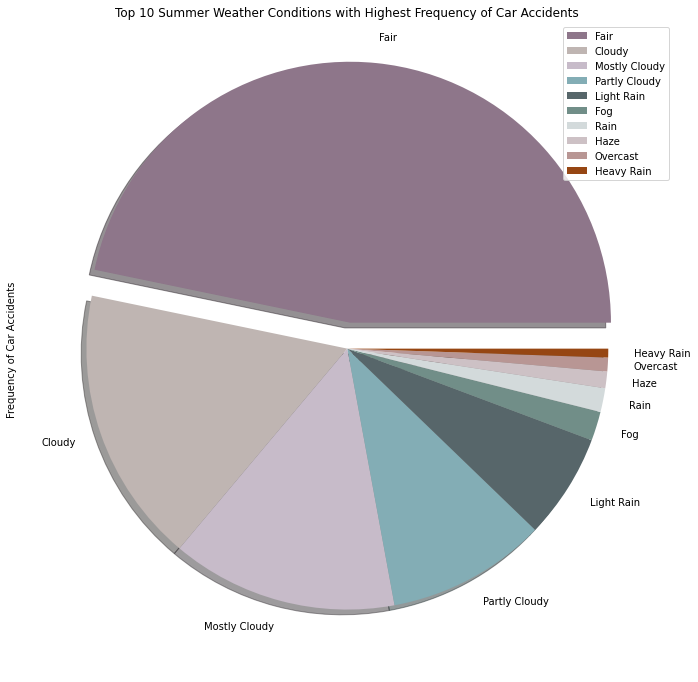

In [10]:
# plotting pie chart displaying results of previous cell
labels = ['Fair', 'Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain', 'Fog', 'Rain', 'Haze', 'Overcast', 'Heavy Rain']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

ax = WeCo_AF.plot(kind = 'pie', y = 'Frequency of Car Accidents', labels = labels, figsize = (12, 12), explode = explode, 
             shadow = True, colors = colors)
ax.set_title('Top 10 Summer Weather Conditions with Highest Frequency of Car Accidents');

### Graph 2: Summer Weather Conditions Most Likely to Cause the Most Severe Car Accidents

Discouraging people from driving during fair weather does not sound right. Therefore, I am adding another graph to show that, just because car accidents are more frequent during fair weather, it does not mean that fair weather is the most dangerous weather condition.

Also, to explain what the 'Severity' column is, I will provide the official description of the column: "The severity column shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)."

In [11]:
# selecting rows from WeCo with severity level 4
WeCoSe4 = WeCo[WeCo['Severity'] == 4]
WeCoSe4

,Weather_Condition,Severity
141631,Fair,4
194263,Light Rain,4
355097,Fair,4
417893,Light Rain,4
512415,Cloudy,4
...,...,...
4232501,Partly Cloudy,4
4232502,Partly Cloudy,4
4232513,Fair,4
4232514,Fair,4


In [12]:
# counting accident frequency of weather conditions with severity level 4
# i'm also adding column names to the results generated by .value_counts()
WeCoSe4_AF = WeCoSe4['Weather_Condition'].value_counts().rename_axis('Weather_Condition').reset_index(name = 'L4_Severity_Frequency').sort_values(by = 'Weather_Condition', ascending = True)  

WeCoSe4_AF

,Weather_Condition,L4_Severity_Frequency
18,Clear,34
1,Cloudy,9066
16,Drizzle,65
24,Drizzle and Fog,5
0,Fair,21277
5,Fog,834
10,Haze,274
23,Heavy Drizzle,7
11,Heavy Rain,242
17,Heavy T-Storm,54


In [13]:
# counting total accident frequency of each weather condition
# i'm also adding column names to the results generated by .value_counts()
WeCo_AF = WeCo['Weather_Condition'].value_counts().rename_axis('Weather_Condition').reset_index(name = 'Frequency').sort_values(by = 'Weather_Condition', ascending = True)
WeCo_AF

,Weather_Condition,Frequency
20,Clear,552
1,Cloudy,310249
17,Drizzle,1367
23,Drizzle and Fog,167
0,Fair,846551
5,Fog,32725
7,Haze,18660
24,Heavy Drizzle,156
9,Heavy Rain,9874
34,Heavy Rain Shower,3


In [14]:
# looking for unique values from WeCoSe4_AF and WeCo_AF to help with filtering in the cell below
print(WeCoSe4_AF['Weather_Condition'].unique())
print(WeCo_AF['Weather_Condition'].unique())

# therefore, 'Heavy Rain Shower', 'Light Rain Showers', 'Squalls', 'Thunderstorm', 'Thunderstorms and Rain', 
# and 'Tornado' should all be removed from WeCo_AF

['Clear' 'Cloudy' 'Drizzle' 'Drizzle and Fog' 'Fair' 'Fog' 'Haze'
 'Heavy Drizzle' 'Heavy Rain' 'Heavy T-Storm'
 'Heavy Thunderstorms and Rain' 'Light Drizzle' 'Light Rain'
 'Light Rain Shower' 'Light Rain with Thunder'
 'Light Thunderstorms and Rain' 'Mostly Cloudy' 'Overcast' 'Partial Fog'
 'Partly Cloudy' 'Patches of Fog' 'Rain' 'Rain Shower' 'Scattered Clouds'
 'Shallow Fog' 'Showers in the Vicinity' 'Smoke' 'T-Storm' 'Thunder'
 'Thunder in the Vicinity']
['Clear' 'Cloudy' 'Drizzle' 'Drizzle and Fog' 'Fair' 'Fog' 'Haze'
 'Heavy Drizzle' 'Heavy Rain' 'Heavy Rain Shower' 'Heavy T-Storm'
 'Heavy Thunderstorms and Rain' 'Light Drizzle' 'Light Rain'
 'Light Rain Shower' 'Light Rain Showers' 'Light Rain with Thunder'
 'Light Thunderstorms and Rain' 'Mostly Cloudy' 'Overcast' 'Partial Fog'
 'Partly Cloudy' 'Patches of Fog' 'Rain' 'Rain Shower' 'Scattered Clouds'
 'Shallow Fog' 'Showers in the Vicinity' 'Smoke' 'Squalls' 'T-Storm'
 'Thunder' 'Thunder in the Vicinity' 'Thunderstorm'
 'Thund

In [15]:
# removing irrelavent rows for math division in the cell below to work
WeCo_AF = WeCo_AF[WeCo_AF.Weather_Condition != 'Heavy Rain Shower']
WeCo_AF = WeCo_AF[WeCo_AF.Weather_Condition != 'Light Rain Showers']
WeCo_AF = WeCo_AF[WeCo_AF.Weather_Condition != 'Squalls']
WeCo_AF = WeCo_AF[WeCo_AF.Weather_Condition != 'Thunderstorm']
WeCo_AF = WeCo_AF[WeCo_AF.Weather_Condition != 'Thunderstorms and Rain']
WeCo_AF = WeCo_AF[WeCo_AF.Weather_Condition != 'Tornado']


WeCo_AF

,Weather_Condition,Frequency
20,Clear,552
1,Cloudy,310249
17,Drizzle,1367
23,Drizzle and Fog,167
0,Fair,846551
5,Fog,32725
7,Haze,18660
24,Heavy Drizzle,156
9,Heavy Rain,9874
16,Heavy T-Storm,2671


In [16]:
# dividing number of level 4 severity accidents by number of total accidents for each weather condition
WeCoSe4_ch = WeCoSe4_AF[['L4_Severity_Frequency']].div(WeCo_AF['Frequency'].values, axis = 0)
WeCoSe4_ch

,L4_Severity_Frequency
18,0.061594
1,0.029222
16,0.047549
24,0.029940
0,0.025134
5,0.025485
10,0.014684
23,0.044872
11,0.024509
17,0.020217


In [17]:
# combine WeCo2_S2's 'Weather_Condition' column with WeCoSe_ch0's 'L4_Severity_Frequency' column
WeCoSe_ch = WeCoSe4_AF.assign(L4_Severity_Frequency = WeCoSe4_ch['L4_Severity_Frequency'])
WeCoSe_ch = WeCoSe_ch.rename(columns = {'L4_Severity_Frequency': 'L4_Severity_Chance'})
WeCoSe_ch = WeCoSe_ch.sort_values(by = 'L4_Severity_Chance', ascending = False)
WeCoSe_ch

,Weather_Condition,L4_Severity_Chance
26,Partial Fog,0.166667
21,Light Rain Shower,0.132653
8,Smoke,0.062229
18,Clear,0.061594
29,Rain Shower,0.047619
16,Drizzle,0.047549
19,Scattered Clouds,0.046967
6,Overcast,0.046638
23,Heavy Drizzle,0.044872
20,Showers in the Vicinity,0.035443


In [18]:
# finding number of rows in WeCoSe_ch to find out how many 0's to add for explode in cell below
print(len(WeCoSe_ch))

# finding unique values of WeCoSe_ch to help define labels in cell below
print(WeCoSe_ch['Weather_Condition'].unique())

30
['Partial Fog' 'Light Rain Shower' 'Smoke' 'Clear' 'Rain Shower' 'Drizzle'
 'Scattered Clouds' 'Overcast' 'Heavy Drizzle' 'Showers in the Vicinity'
 'T-Storm' 'Thunder in the Vicinity' 'Light Drizzle' 'Thunder'
 'Drizzle and Fog' 'Cloudy' 'Light Rain' 'Light Rain with Thunder' 'Rain'
 'Mostly Cloudy' 'Partly Cloudy' 'Fog' 'Fair' 'Heavy Rain'
 'Heavy Thunderstorms and Rain' 'Heavy T-Storm'
 'Light Thunderstorms and Rain' 'Haze' 'Patches of Fog' 'Shallow Fog']


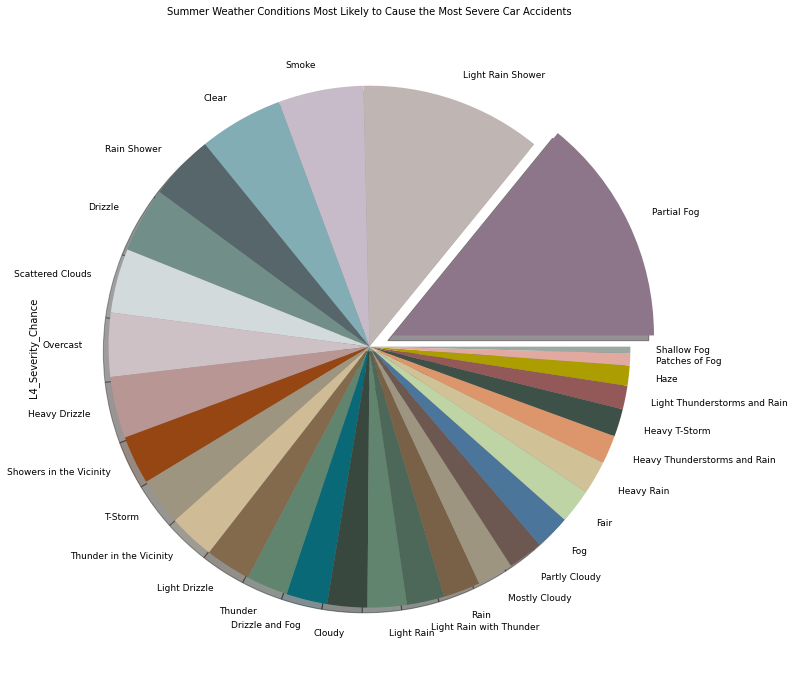

In [109]:
# pie chart displaying Weather Conditions & their Chances of Level 4 Severity
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = ['Partial Fog', 'Light Rain Shower', 'Smoke', 'Clear', 'Rain Shower', 'Drizzle',
 'Scattered Clouds', 'Overcast', 'Heavy Drizzle', 'Showers in the Vicinity',
 'T-Storm', 'Thunder in the Vicinity', 'Light Drizzle', 'Thunder',
 'Drizzle and Fog', 'Cloudy', 'Light Rain', 'Light Rain with Thunder', 'Rain',
 'Mostly Cloudy', 'Partly Cloudy', 'Fog', 'Fair', 'Heavy Rain',
 'Heavy Thunderstorms and Rain', 'Heavy T-Storm',
 'Light Thunderstorms and Rain', 'Haze', 'Patches of Fog', 'Shallow Fog']

ax = WeCoSe_ch.plot(kind = 'pie', y = 'L4_Severity_Chance', labels = labels, figsize = (12, 12), textprops = {'fontsize': 9}, shadow = True, colors = colors, explode = explode)
ax.get_legend().remove()
ax.set_title('Summer Weather Conditions Most Likely to Cause the Most Severe Car Accidents', fontsize = 10);

## Methodology 2: Temperature (in Celsius)
In this methodology, I will be utilizing data from the 'Temperature(C)' column to determine the impact of some of the summer weather's temperature ranges with regards to driving conditions.

### Preparing Dataset for this Methodology

In [20]:
# creating dataframe containing the relevant columns
Temp = CleanAcc[['Temperature(C)']]

# U.S. highest recorded summer temp is 56.7(C). can't find lowest recorded, so will use lowest summer temp average: 11.3(C)
SUTe = Temp[(Temp['Temperature(C)'] >= 11.3) & (Temp['Temperature(C)'] <= 56.7)] 

SUTe

,Temperature(C)
590,18.888889
42863,30.555556
42879,30.555556
42953,35.555556
42970,34.444444
...,...
4232536,30.000000
4232537,21.111111
4232538,22.777778
4232539,21.666667


### Graph 3: Frequency of Car Accidents by Ranges of Summer Temperature

In [21]:
# finding largest value in SUTe's Temperature(C)' to use for while loop in a cell below
SUTe_max = float(SUTe[['Temperature(C)']].max())
SUTe_max = round(SUTe_max, 1)
SUTe_max

52.8

In [22]:
# equally distributing ranges for 10 bars to use for while loop in the cell below
SUTe_bar = float(SUTe_max/10)
SUTe_bar = round(SUTe_bar, 1)
SUTe_bar

5.3

In [23]:
# making a list of ranges based off of SUTe's Temperature(C)'
SUTe_ra = []
SUTe_val = 0

while SUTe_val <= SUTe_max:
    SUTe_ra.append(SUTe_val)
    SUTe_val += SUTe_bar

SUTe_ra

[0,
 5.3,
 10.6,
 15.899999999999999,
 21.2,
 26.5,
 31.8,
 37.1,
 42.4,
 47.699999999999996]

In [24]:
# rename columns because the parentheses in 'Temperature(C)' will be messing with groupby
SUTe = SUTe.rename(columns = {'Temperature(C)': 'Temperature_C'})

# creating dataframe of temperature ranges and their frequencies
ranges = SUTe_ra
SUTe_AF = SUTe.groupby(pd.cut(SUTe.Temperature_C, ranges)).count()

SUTe_AF

,Temperature_C
Temperature_C,
"(0.0, 5.3]",0
"(5.3, 10.6]",0
"(10.6, 15.9]",277854
"(15.9, 21.2]",383899
"(21.2, 26.5]",338798
"(26.5, 31.8]",233269
"(31.8, 37.1]",64612
"(37.1, 42.4]",9278
"(42.4, 47.7]",577


In [25]:
# renaming and resetting index to make data easier to plot
SUTe_AF = SUTe_AF.rename(columns = {'Temperature_C': 'Number of Accidents'})
SUTe_AF = SUTe_AF.reset_index()
SUTe_AF = SUTe_AF.rename(columns = {'Temperature_C': 'Ranges of Temperature (in C)'})

SUTe_AF

,Ranges of Temperature (in C),Number of Accidents
0,"(0.0, 5.3]",0
1,"(5.3, 10.6]",0
2,"(10.6, 15.9]",277854
3,"(15.9, 21.2]",383899
4,"(21.2, 26.5]",338798
5,"(26.5, 31.8]",233269
6,"(31.8, 37.1]",64612
7,"(37.1, 42.4]",9278
8,"(42.4, 47.7]",577


In [26]:
# replacing characters in column for easier viewing
SUTe_AF['Ranges of Temperature (in C)'] = SUTe_AF['Ranges of Temperature (in C)'].astype(str).str.replace('(', '', regex = False)
SUTe_AF['Ranges of Temperature (in C)'] = SUTe_AF['Ranges of Temperature (in C)'].astype(str).str.replace(']', '', regex = False)
SUTe_AF['Ranges of Temperature (in C)'] = SUTe_AF['Ranges of Temperature (in C)'].astype(str).str.replace(',', ' to', regex = False)

SUTe_AF

,Ranges of Temperature (in C),Number of Accidents
0,0.0 to 5.3,0
1,5.3 to 10.6,0
2,10.6 to 15.9,277854
3,15.9 to 21.2,383899
4,21.2 to 26.5,338798
5,26.5 to 31.8,233269
6,31.8 to 37.1,64612
7,37.1 to 42.4,9278
8,42.4 to 47.7,577


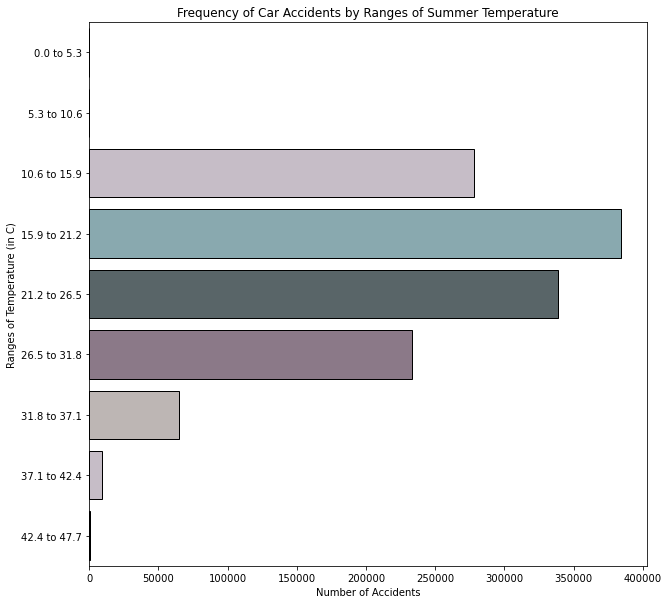

In [90]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = 'Number of Accidents', y = 'Ranges of Temperature (in C)', data = SUTe_AF, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Car Accidents by Ranges of Summer Temperature');

## Methodology 3: Precipitation (in mm)
In this methodology, I will be utilizing data from the 'Precipitation(mm)' column to determine the impact of some of the summer weather's rainfall ranges with regards to driving conditions.

### Preparing Dataset for this Methodology

In [28]:
# creating dataframe containing the relevant columns
PrCi = CleanAcc[['Precipitation(mm)']]

# keeping values within U.S. summer rainfall averages: 181 mm and 7 mm
SUPrCi = PrCi[(PrCi['Precipitation(mm)'] >= 7) & (PrCi['Precipitation(mm)'] <= 181)] 

SUPrCi

,Precipitation(mm)
73708,7.112
132446,8.382
143969,8.636
143971,8.890
205337,7.620
...,...
4231660,11.176
4231661,11.176
4231712,25.146
4232189,43.942


### Graph 4: Frequency of Car Accidents by Ranges of Summer Precipitation (in mm)

In [29]:
# largest value in PrCi_0's Precipation(mm)'
SUPrCi_max = SUPrCi['Precipitation(mm)'].max()
SUPrCi_max

128.52399999999997

In [30]:
# equally distributing ranges for 10 bars
SUPrCi_bar = SUPrCi_max/10
SUPrCi_bar

12.852399999999998

In [31]:
# making a list of ranges based off of  'Precipitation(mm)'
SUPrRa = []
SUPrCi_val = 0

while SUPrCi_val <= SUPrCi_max:
    SUPrRa.append(SUPrCi_val)
    SUPrCi_val += SUPrCi_bar

SUPrRa

[0,
 12.852399999999998,
 25.704799999999995,
 38.557199999999995,
 51.40959999999999,
 64.26199999999999,
 77.11439999999999,
 89.96679999999999,
 102.8192,
 115.6716]

In [32]:
# creating dataframe containing the relevant columns
PrCi = CleanAcc[['Precipitation(mm)']]

# rename columns because the parentheses in 'Precipitation(mm)' are messing with the groupby
PrCi = PrCi.rename(columns = {'Precipitation(mm)': 'Precipitation_mm'})
                                      
ranges = SUPrRa
PrCi_Ra = PrCi.groupby(pd.cut(PrCi.Precipitation_mm, ranges)).count()

PrCi_Ra

,Precipitation_mm
Precipitation_mm,
"(0.0, 12.852]",175253
"(12.852, 25.705]",2002
"(25.705, 38.557]",300
"(38.557, 51.41]",59
"(51.41, 64.262]",7
"(64.262, 77.114]",10
"(77.114, 89.967]",4
"(89.967, 102.819]",0
"(102.819, 115.672]",0


In [33]:
# renaming and resetting index to make data easier to plot
PrCi_Ra = PrCi_Ra.rename(columns = {'Precipitation_mm': 'Number of Accidents'})
PrCi_Ra = PrCi_Ra.reset_index()
PrCi_Ra = PrCi_Ra.rename(columns = {'Precipitation_mm': 'Ranges of Precipitation (in mm)'})

PrCi_Ra

,Ranges of Precipitation (in mm),Number of Accidents
0,"(0.0, 12.852]",175253
1,"(12.852, 25.705]",2002
2,"(25.705, 38.557]",300
3,"(38.557, 51.41]",59
4,"(51.41, 64.262]",7
5,"(64.262, 77.114]",10
6,"(77.114, 89.967]",4
7,"(89.967, 102.819]",0
8,"(102.819, 115.672]",0


In [34]:
# replacing characters in column for easier viewing
PrCi_Ra['Ranges of Precipitation (in mm)'] = PrCi_Ra['Ranges of Precipitation (in mm)'].astype(str).str.replace('(', '', regex = False)
PrCi_Ra['Ranges of Precipitation (in mm)'] = PrCi_Ra['Ranges of Precipitation (in mm)'].astype(str).str.replace(']', '', regex = False)
PrCi_Ra['Ranges of Precipitation (in mm)'] = PrCi_Ra['Ranges of Precipitation (in mm)'].astype(str).str.replace(',', ' to', regex = False)

PrCi_Ra

,Ranges of Precipitation (in mm),Number of Accidents
0,0.0 to 12.852,175253
1,12.852 to 25.705,2002
2,25.705 to 38.557,300
3,38.557 to 51.41,59
4,51.41 to 64.262,7
5,64.262 to 77.114,10
6,77.114 to 89.967,4
7,89.967 to 102.819,0
8,102.819 to 115.672,0


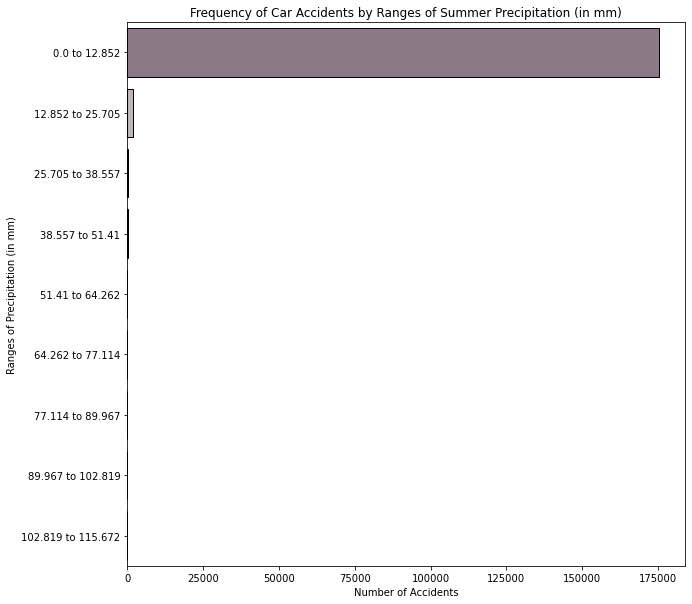

In [35]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = 'Number of Accidents', y = 'Ranges of Precipitation (in mm)', data = PrCi_Ra, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Car Accidents by Ranges of Summer Precipitation (in mm)');

### Graph 5: Frequency of Car Accidents by My First Range of Summer Precipitation (in mm)
Since the data looks so skewed towards the first range in the previous bar graph, I will split the first range into 10 bars and quickly plot the results into another bar graph.

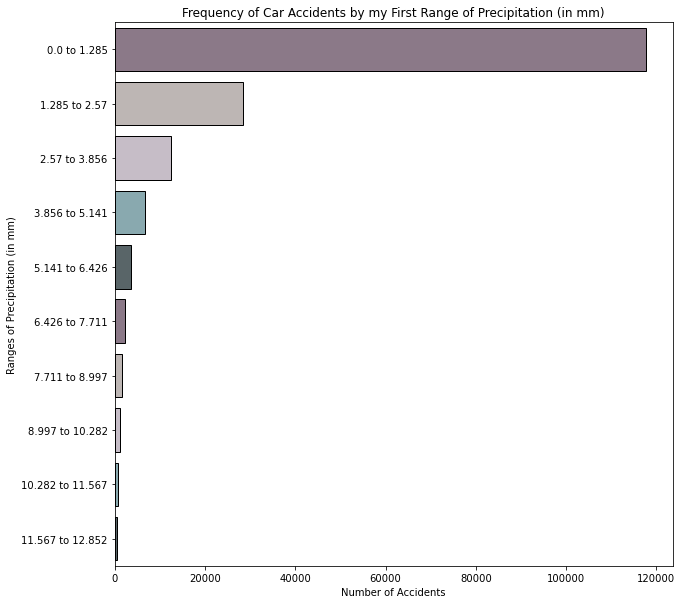

In [36]:
# splitting SUPrCi_bar into 10 bars
SUPrCi_bar2 = SUPrCi_bar/10

# making a list of ranges based off of PrCi_bar
SUPrRa2 = []
SUPrCi_val2 = 0

while SUPrCi_val2 <= SUPrCi_bar:
    SUPrRa2.append(SUPrCi_val2)
    SUPrCi_val2 += SUPrCi_bar2

# creating dataframe containing the relevant columns
PrCi = CleanAcc[['Precipitation(mm)']]

# rename columns because the parentheses in 'Precipitation(mm)' are messing with the groupby
PrCi = PrCi.rename(columns = {'Precipitation(mm)': 'Precipitation_mm'})
                                      
ranges = SUPrRa2
PrCi_Ra = PrCi.groupby(pd.cut(PrCi.Precipitation_mm, ranges)).count()

# renaming and resetting index to make data easier to plot
PrCi_Ra = PrCi_Ra.rename(columns = {'Precipitation_mm': 'Number of Accidents'})
PrCi_Ra = PrCi_Ra.reset_index()
PrCi_Ra = PrCi_Ra.rename(columns = {'Precipitation_mm': 'Ranges of Precipitation (in mm)'})

# replacing characters in column for easier viewing
PrCi_Ra['Ranges of Precipitation (in mm)'] = PrCi_Ra['Ranges of Precipitation (in mm)'].astype(str).str.replace('(', '', regex = False)
PrCi_Ra['Ranges of Precipitation (in mm)'] = PrCi_Ra['Ranges of Precipitation (in mm)'].astype(str).str.replace(']', '', regex = False)
PrCi_Ra['Ranges of Precipitation (in mm)'] = PrCi_Ra['Ranges of Precipitation (in mm)'].astype(str).str.replace(',', ' to', regex = False)

# plotting data from previous result into a bar graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = 'Number of Accidents', y = 'Ranges of Precipitation (in mm)', data = PrCi_Ra, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Car Accidents by my First Range of Precipitation (in mm)');

## Methodology 4: Humidity (in %)
In this methodology, I will be utilizing data from the 'Humidity(%)' column to determine the impact of some of the summer weather's humidity ranges with regards to driving conditions.

### Preparing Dataset for this Methodology

In [37]:
# creating dataframe containing the relevant columns
HuMi = CleanAcc[['Humidity(%)']]

# keeping values within U.S. summer humidity's lowest and highest averages: 20% and 92%
SUHuMi = HuMi[(HuMi['Humidity(%)'] >= 20) & (HuMi['Humidity(%)'] <= 92)] 

SUHuMi

,Humidity(%)
22,89.0
26,86.0
27,70.0
30,89.0
34,92.0
...,...
4232536,40.0
4232537,73.0
4232538,64.0
4232539,81.0


### Graph 6: Frequency of Car Accidents by Summer Ranges of Humidity (in %)

In [38]:
# largest value in SUHuMi's Humidity(%)'
SUHuMi_max = float(SUHuMi[['Humidity(%)']].max())
SUHuMi_max = round(SUHuMi_max, 1)
SUHuMi_max

92.0

In [39]:
# equally distributing ranges for 10 bars
SUHuMi_bar = float(SUHuMi_max/10)
SUHuMi_bar = round(SUHuMi_bar, 1)
SUHuMi_bar

9.2

In [40]:
# making a list of ranges based off of SUHuMi's Humidity(%)'
SUHuMi_ra = []
SUHuMi_val = 0

while SUHuMi_val <= SUHuMi_max:
    SUHuMi_ra.append(SUHuMi_val)
    SUHuMi_val += SUHuMi_bar

SUHuMi_ra

[0,
 9.2,
 18.4,
 27.599999999999998,
 36.8,
 46.0,
 55.2,
 64.4,
 73.60000000000001,
 82.80000000000001]

In [41]:
# rename columns because the parentheses and percentage symbol will mess with my groupby
HuMi = HuMi.rename(columns = {'Humidity(%)': 'Humidity_percent'})

# creating dataframe of temperature ranges and their frequencies
ranges = SUHuMi_ra
HuMi_AF = HuMi.groupby(pd.cut(HuMi.Humidity_percent, ranges)).count()

HuMi_AF

,Humidity_percent
Humidity_percent,
"(0.0, 9.2]",13001
"(9.2, 18.4]",43790
"(18.4, 27.6]",71121
"(27.6, 36.8]",109434
"(36.8, 46.0]",170747
"(46.0, 55.2]",191696
"(55.2, 64.4]",218633
"(64.4, 73.6]",247478
"(73.6, 82.8]",281195


In [42]:
# renaming and resetting index to make data easier to plot
HuMi_AF = HuMi_AF.rename(columns = {'Humidity_percent': 'Number of Accidents'})
HuMi_AF = HuMi_AF.reset_index()
HuMi_AF = HuMi_AF.rename(columns = {'Humidity_percent': 'Ranges of Humidity (in %)'})

HuMi_AF

,Ranges of Humidity (in %),Number of Accidents
0,"(0.0, 9.2]",13001
1,"(9.2, 18.4]",43790
2,"(18.4, 27.6]",71121
3,"(27.6, 36.8]",109434
4,"(36.8, 46.0]",170747
5,"(46.0, 55.2]",191696
6,"(55.2, 64.4]",218633
7,"(64.4, 73.6]",247478
8,"(73.6, 82.8]",281195


In [43]:
# replacing characters in column for easier viewing
HuMi_AF['Ranges of Humidity (in %)'] = HuMi_AF['Ranges of Humidity (in %)'].astype(str).str.replace('(', '', regex = False)
HuMi_AF['Ranges of Humidity (in %)'] = HuMi_AF['Ranges of Humidity (in %)'].astype(str).str.replace(']', '', regex = False)
HuMi_AF['Ranges of Humidity (in %)'] = HuMi_AF['Ranges of Humidity (in %)'].astype(str).str.replace(',', ' to', regex = False)

HuMi_AF

,Ranges of Humidity (in %),Number of Accidents
0,0.0 to 9.2,13001
1,9.2 to 18.4,43790
2,18.4 to 27.6,71121
3,27.6 to 36.8,109434
4,36.8 to 46.0,170747
5,46.0 to 55.2,191696
6,55.2 to 64.4,218633
7,64.4 to 73.6,247478
8,73.6 to 82.8,281195


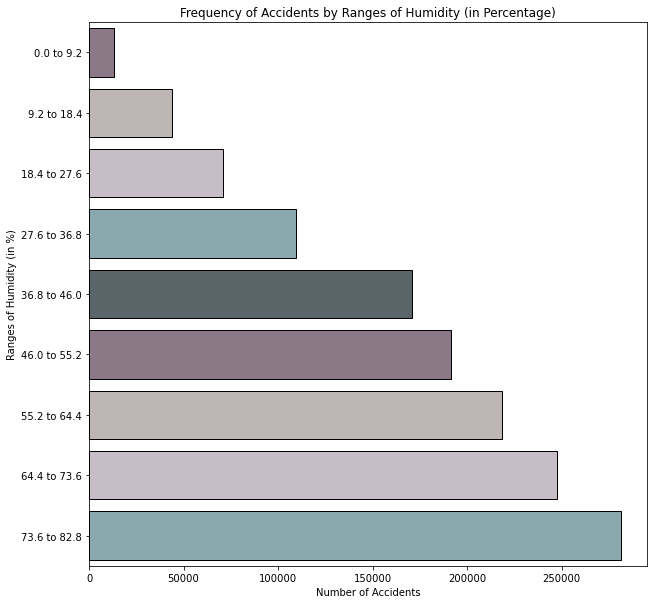

In [91]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = 'Number of Accidents', y = 'Ranges of Humidity (in %)', data = HuMi_AF, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Accidents by Ranges of Humidity (in Percentage)');

## Methodology 5: Wind Speed (in kph)
In this methodology, I will be utilizing data from the 'Wind_Speed(kph)' column to determine the impact of some of the summer weather's wind speed ranges with regards to driving conditions.

### Preparing Dataset for this Methodology

In [45]:
# creating dataframe containing the relevant column
WiSp = CleanAcc[['Wind_Speed(kph)']]

# keeping values within U.S. summer humidity's lowest and highest averages: 10.0 kph and 19.8 kph
SUWiSp = WiSp[(WiSp['Wind_Speed(kph)'] >= 20) & (WiSp['Wind_Speed(kph)'] <= 92)] 

SUWiSp.sort_values(by = ['Wind_Speed(kph)'], ascending = False)

,Wind_Speed(kph)
1155529,85.2770
714427,85.2770
3448628,83.6680
3448629,83.6680
523461,83.6680
...,...
2374429,20.4343
2374378,20.4343
2374258,20.4343
2374257,20.4343


### Graph 7: Frequency of Car Accidents by Summar Ranges of Wind Speed (in kph)

In [46]:
# largest value in SUWiSp's 'Wind_Speed(kph)'
SUWiSp_max = float(SUWiSp[['Wind_Speed(kph)']].max())
SUWiSp_max = round(SUWiSp_max, 1)
SUWiSp_max

85.3

In [47]:
# equally distributing ranges for 10 bars
SUWiSp_bar = float(SUWiSp_max/10)
SUWiSp_bar = round(SUWiSp_bar, 1)
SUWiSp_bar

8.5

In [48]:
# making a list of ranges based off of 'Wind_Speed(kph)'
SUWiSp_ra = []
SUWiSp_val = 0

while SUWiSp_val <= SUWiSp_max:
    SUWiSp_ra.append(SUWiSp_val)
    SUWiSp_val += SUWiSp_bar

SUWiSp_ra

[0, 8.5, 17.0, 25.5, 34.0, 42.5, 51.0, 59.5, 68.0, 76.5, 85.0]

In [49]:
# rename columns because the parentheses in 'Wind_Speed(kph)' will be messing with groupby
WiSp = WiSp.rename(columns = {'Wind_Speed(kph)': 'WindSpeed_kph'})

# creating dataframe of wind speed ranges and their frequencies
ranges = SUWiSp_ra
WiSp_AF = WiSp.groupby(pd.cut(WiSp.WindSpeed_kph, ranges)).count()
WiSp_AF

,WindSpeed_kph
WindSpeed_kph,
"(0.0, 8.5]",392353
"(8.5, 17.0]",769880
"(17.0, 25.5]",285334
"(25.5, 34.0]",113785
"(34.0, 42.5]",24142
"(42.5, 51.0]",4275
"(51.0, 59.5]",998
"(59.5, 68.0]",333
"(68.0, 76.5]",45


In [50]:
# renaming and resetting index to make data easier to plot
WiSp_AF = WiSp_AF.rename(columns = {'WindSpeed_kph': 'Number of Accidents'})
WiSp_AF = WiSp_AF.reset_index()
WiSp_AF = WiSp_AF.rename(columns = {'WindSpeed_kph': 'Ranges of Wind Speed (in kph)'})

WiSp_AF

,Ranges of Wind Speed (in kph),Number of Accidents
0,"(0.0, 8.5]",392353
1,"(8.5, 17.0]",769880
2,"(17.0, 25.5]",285334
3,"(25.5, 34.0]",113785
4,"(34.0, 42.5]",24142
5,"(42.5, 51.0]",4275
6,"(51.0, 59.5]",998
7,"(59.5, 68.0]",333
8,"(68.0, 76.5]",45
9,"(76.5, 85.0]",15


In [51]:
# replacing characters in column for easier viewing
WiSp_AF['Ranges of Wind Speed (in kph)'] = WiSp_AF['Ranges of Wind Speed (in kph)'].astype(str).str.replace('(', '', regex = False)
WiSp_AF['Ranges of Wind Speed (in kph)'] = WiSp_AF['Ranges of Wind Speed (in kph)'].astype(str).str.replace(']', '', regex = False)
WiSp_AF['Ranges of Wind Speed (in kph)'] = WiSp_AF['Ranges of Wind Speed (in kph)'].astype(str).str.replace(',', ' to', regex = False)

WiSp_AF

,Ranges of Wind Speed (in kph),Number of Accidents
0,0.0 to 8.5,392353
1,8.5 to 17.0,769880
2,17.0 to 25.5,285334
3,25.5 to 34.0,113785
4,34.0 to 42.5,24142
5,42.5 to 51.0,4275
6,51.0 to 59.5,998
7,59.5 to 68.0,333
8,68.0 to 76.5,45
9,76.5 to 85.0,15


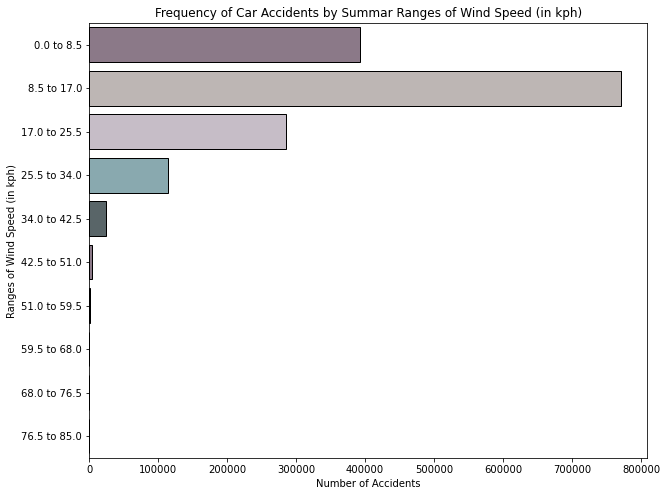

In [52]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x = 'Number of Accidents', y = 'Ranges of Wind Speed (in kph)', data = WiSp_AF, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Car Accidents by Summar Ranges of Wind Speed (in kph)');

## Methodology 6: Road Types
In this methodology, I will be utilizing data from the 'Junction', 'Roundabout', 'Turning_Loop', and 'Severity' columns to determine the impact of some of the road types with regards to driving conditions.

### Graph 8: Frequency of Car Accidents by Road Types

In [53]:
# creating dataframe containing 'Junction' 
Ju = pd.DataFrame(CleanAcc, columns = ['Junction'])

# obtaining frequency of 'True' in Junction
Ju_Tr = Ju[Ju.Junction == True]
len(Ju_Tr)

146283

In [54]:
# creating dataframe containing 'Roundabout' 
Ro = pd.DataFrame(CleanAcc, columns = ['Roundabout'])

# obtaining frequency of 'True' in 'Roundabout'
Ro_Tr = Ro[Ro.Roundabout == True]
len(Ro_Tr)

108

In [55]:
# creating dataframe containing 'Turning_Loop' 
Tu = pd.DataFrame(CleanAcc, columns = ['Turning_Loop'])

# obtaining frequency of 'True' in 'Turning_Loop'
Tu_Tr = Tu[Tu.Turning_Loop == True]
len(Tu_Tr)

0

In [56]:
# creating dataframe containing results of previous three cells for graph
JuRoTu_data = {'Road Types':  ['Junction', 'Roundabout', 'Turning_Loop'], 
               'Number of Accidents': [len(Ju_Tr), len(Ro_Tr), len(Tu_Tr)]}
JuRoTu = pd.DataFrame(data = JuRoTu_data, columns = ['Road Types', 'Number of Accidents'])

JuRoTu

,Road Types,Number of Accidents
0,Junction,146283
1,Roundabout,108
2,Turning_Loop,0


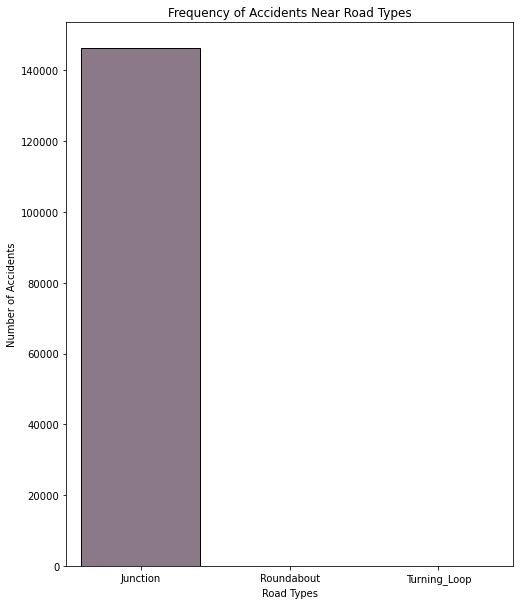

In [94]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (8, 10))

sns.barplot(x = 'Road Types', y = 'Number of Accidents', data = JuRoTu, palette = CUearth, edgecolor = 'k')
ax.set_title('Frequency of Accidents Near Road Types');

### Graph 9: Road Types Most Likely to Cause the Most Severe Car Accidents
Since the data looks so skewed towards junctions in the previous bar graph, I will quickly make a bar graph to show the road types with the highest chances of causing a car accident with level 4 severity.

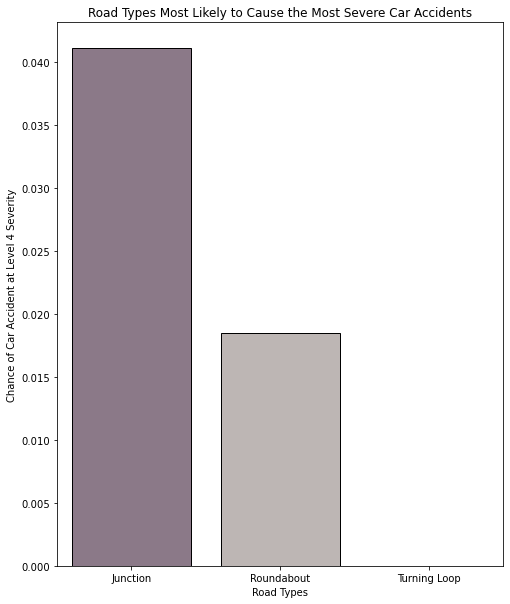

In [58]:
# creating dataframe containing 'Junction', 'Roundabout', 'Turning_Loop', 'Severity'
JuRoTuSe = CleanAcc[['Junction', 'Roundabout', 'Turning_Loop', 'Severity']]


# counting frequency of level 4 severity near a Junction
JuRoTuSe_Ju4 = JuRoTuSe[(JuRoTuSe['Junction'] == True) & (JuRoTuSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Roundabout
JuRoTuSe_Ro4 = JuRoTuSe[(JuRoTuSe['Roundabout'] == True) & (JuRoTuSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Turning_Loop
JuRoTuSe_Tu4 = JuRoTuSe[(JuRoTuSe['Turning_Loop'] == True) & (JuRoTuSe['Severity'] == 4)]


# finding chances of level 4 severity near a Junction
JuRoTuSe_Ju4_ch = len(JuRoTuSe_Ju4)/len(Ju_Tr)

# finding chances of level 4 severity near a Roundabout
JuRoTuSe_Ro4_ch = len(JuRoTuSe_Ro4)/len(Ro_Tr)

# finding chances of level 4 severity near a Turning_Loop
JuRoTuSe_Tu4_ch = 0 # can't use len(JuRoTuSe_Tu4)/len(Tu_Tr) because len(JuRoTuSe_Tu4) is a zero, which is not divisible


# creating dataframe containing chances of level 4 severity by road types
JuRoTuSe_ch_data = {'Road Types': ['Junction', 'Roundabout', 'Turning Loop'], 
                      'Chance of Car Accident at Level 4 Severity': [JuRoTuSe_Ju4_ch, JuRoTuSe_Ro4_ch, 
                                                                     JuRoTuSe_Tu4_ch]}
JuRoTuSe_ch = pd.DataFrame(data = JuRoTuSe_ch_data, columns = ['Road Types', 
                                                                   'Chance of Car Accident at Level 4 Severity'])

# plotting data from previous cell into bar chart
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Road Types', y = 'Chance of Car Accident at Level 4 Severity', data = JuRoTuSe_ch, palette = muted_earth, edgecolor = 'k')
ax.set_title('Road Types Most Likely to Cause the Most Severe Car Accidents');

## Methodology 7: Traffic Signs
In this methodology, I will be utilizing data from the 'Give_Way', 'No_Exit', 'Stop', and 'Severity' columns to determine the impact of some of the traffic signs with regards to driving conditions.

### Graph 10: Frequency of Car Accidents Near Traffic Signs

In [59]:
# creating dataframe containing 'Give_Way'
GiWa = pd.DataFrame(CleanAcc, columns = ['Give_Way'])

# obtaining frequency of 'True' in 'Give_Way'
GiWa_Tr = GiWa[GiWa.Give_Way == True]
len(GiWa_Tr)

5579

In [60]:
# creating dataframe containing 'No_Exit'
NoEx = pd.DataFrame(CleanAcc, columns = ['No_Exit'])

# obtaining frequency of 'True' in 'No_Exit'
NoEx_Tr = NoEx[NoEx.No_Exit == True]
len(NoEx_Tr)

2836

In [61]:
# creating dataframe containing 'Stop'
StOp = pd.DataFrame(CleanAcc, columns = ['Stop'])

# obtaining frequency of 'True' in 'No_Exit'
StOp_Tr = StOp[StOp.Stop == True]
len(StOp_Tr)

32941

In [62]:
# creating dataframe containing results of previous three cells for graph
GiNoSt_data = {'Traffic Signs':  ['Give Way', 'No Exit', 'Stop'], 
               'Number of Accidents': [len(GiWa_Tr), len(NoEx_Tr), len(StOp_Tr)]}
GiNoSt = pd.DataFrame(data = GiNoSt_data, columns = ['Traffic Signs', 'Number of Accidents'])

GiNoSt

,Traffic Signs,Number of Accidents
0,Give Way,5579
1,No Exit,2836
2,Stop,32941


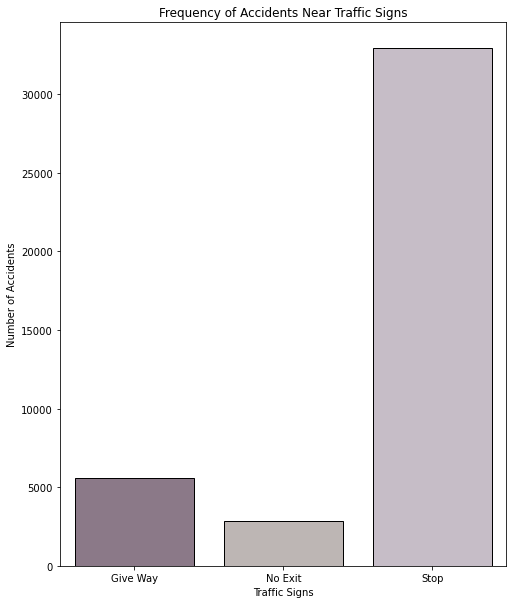

In [63]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Traffic Signs', y = 'Number of Accidents', data = GiNoSt, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Accidents Near Traffic Signs');

### Graph 11: Traffic Signs Most Likely to Cause the Most Severe Car Accidents

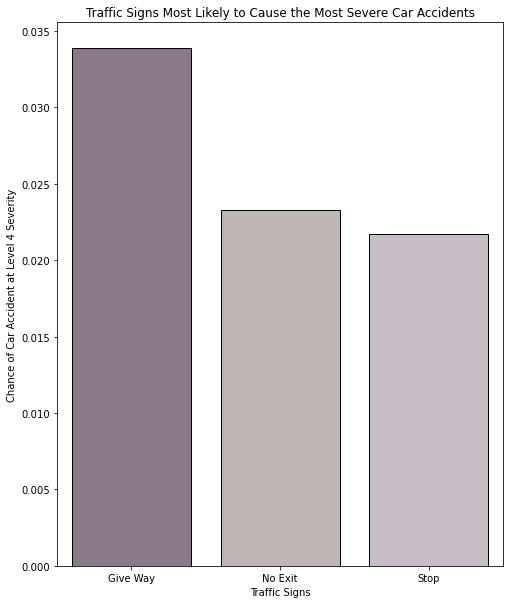

In [64]:
# creating dataframe containing 'Give_Way', 'No_Exit', 'Stop', 'Severity'
GiNoStSe = CleanAcc[['Give_Way', 'No_Exit', 'Stop', 'Severity']]


# counting frequency of level 4 severity near a Traffic_Signal
GiNoStSe_Gi4 = GiNoStSe[(GiNoStSe['Give_Way'] == True) & (GiNoStSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Traffic_Calming
GiNoStSe_No4 = GiNoStSe[(GiNoStSe['No_Exit'] == True) & (GiNoStSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Bump
GiNoStSe_St4 = GiNoStSe[(GiNoStSe['Stop'] == True) & (GiNoStSe['Severity'] == 4)]


# finding chances of level 4 severity near a Give_Way
GiNoStSe_Gi4_ch = len(GiNoStSe_Gi4)/len(GiWa_Tr)

# finding chances of level 4 severity near a No_Exit
GiNoStSe_No4_ch = len(GiNoStSe_No4)/len(NoEx_Tr)

# finding chances of level 4 severity near a Stop
GiNoStSe_St4_ch = len(GiNoStSe_St4)/len(StOp_Tr)


# creating dataframe containing chances of level 4 severity near traffic signs
GiNoStSe_ch_data = {'Traffic Signs': ['Give Way', 'No Exit', 'Stop'], 
                      'Chance of Car Accident at Level 4 Severity': [GiNoStSe_Gi4_ch, GiNoStSe_No4_ch, 
                                                                     GiNoStSe_St4_ch]}
GiNoStSe_ch = pd.DataFrame(data = GiNoStSe_ch_data, columns = ['Traffic Signs', 
                                                                   'Chance of Car Accident at Level 4 Severity'])

# plotting data from previous cell into bar chart
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Traffic Signs', y = 'Chance of Car Accident at Level 4 Severity', data = GiNoStSe_ch, palette = muted_earth, edgecolor = 'k')
ax.set_title('Traffic Signs Most Likely to Cause the Most Severe Car Accidents');

## Methodology 8: Areas Controlling Speed
In this methodology, I will be utilizing data from the 'Traffic_Signal', 'Traffic_Calming', 'Bump', 'Crossing', and 'Severity' columns to determine the impact of some of the areas of speed-control with regards to driving conditions.

### Graph 12: Frequency of Car Accidents Near Areas Controlling Speed

In [65]:
# creating dataframe containing 'Traffic_Signal'
TrSi = pd.DataFrame(CleanAcc, columns = ['Traffic_Signal'])

# obtaining frequency of 'True' in 'Traffic_Signal'
TrSi_Tr = TrSi[TrSi.Traffic_Signal == True]
len(TrSi_Tr)

316705

In [66]:
# creating dataframe containing 'Traffic_Calming'
TrCa = pd.DataFrame(CleanAcc, columns = ['Traffic_Calming'])

# obtaining frequency of 'True' in 'Traffic_Calming'
TrCa_Tr = TrCa[TrCa.Traffic_Calming == True]
len(TrCa_Tr)

1043

In [67]:
# creating dataframe containing 'Bump'
BuMp = pd.DataFrame(CleanAcc, columns = ['Bump'])

# obtaining frequency of 'True' in 'Bump'
BuMp_Tr = BuMp[BuMp.Bump == True]
len(BuMp_Tr)

496

In [68]:
# creating dataframe containing 'Crossing'
CrSi = pd.DataFrame(CleanAcc, columns = ['Crossing'])

# obtaining frequency of 'True' in 'Crossing'
CrSi_Tr = CrSi[CrSi.Crossing == True]
len(CrSi_Tr)

157612

In [69]:
# creating dataframe containing results of previous three cells for graph
TrTrBuCr_data = {'Speed-controls':  ['Traffic Signal', 'Traffic Calming', 'Speed Bump', 'Zebra Crossing'], 
                 'Number of Accidents': [len(TrSi_Tr), len(TrCa_Tr), len(BuMp_Tr), len(CrSi_Tr)]}
TrTrBuCr = pd.DataFrame(data = TrTrBuCr_data, columns = ['Speed-controls', 'Number of Accidents'])

TrTrBuCr

,Speed-controls,Number of Accidents
0,Traffic Signal,316705
1,Traffic Calming,1043
2,Speed Bump,496
3,Zebra Crossing,157612


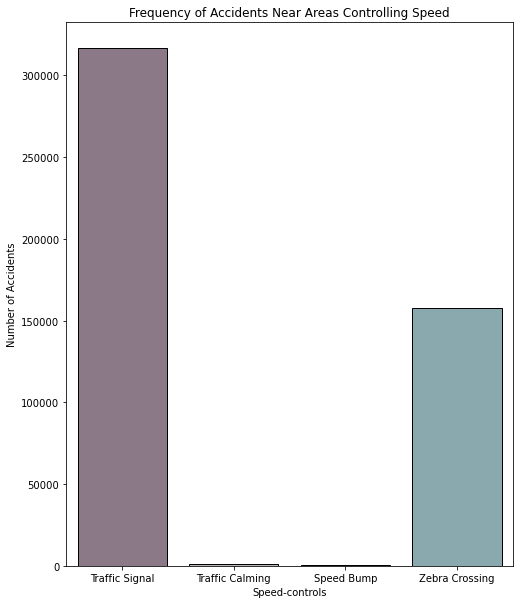

In [96]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Speed-controls', y = 'Number of Accidents', data = TrTrBuCr, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Accidents Near Areas Controlling Speed');

### Graph 13: Areas of Speed-control Most Likely to Cause the Most Severe Car Accidents

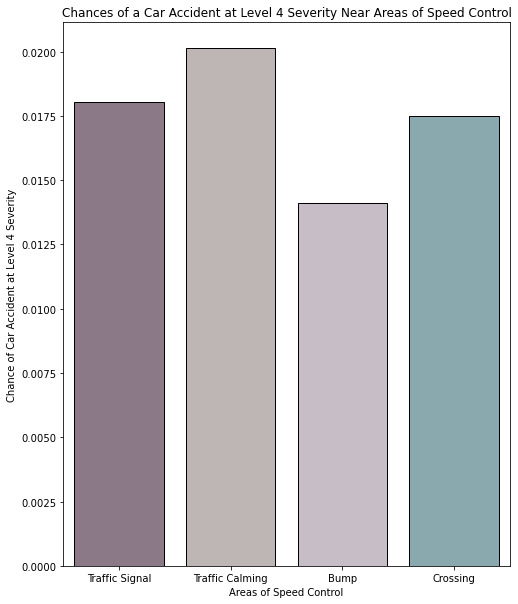

In [71]:
# creating dataframe containing 'Traffic_Signal', 'Traffic_Calming', 'Crossing', and 'Severity'
TrTrBuCrSe = CleanAcc[['Traffic_Signal', 'Traffic_Calming', 'Bump', 'Crossing', 'Severity']]


# counting frequency of level 4 severity near a Traffic_Signal
TrTrBuCrSe_TS4 = TrTrBuCrSe[(TrTrBuCrSe['Traffic_Signal'] == True) & (TrTrBuCrSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Traffic_Calming
TrTrBuCrSe_TC4 = TrTrBuCrSe[(TrTrBuCrSe['Traffic_Calming'] == True) & (TrTrBuCrSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Bump
TrTrBuCrSe_Bu4 = TrTrBuCrSe[(TrTrBuCrSe['Bump'] == True) & (TrTrBuCrSe['Severity'] == 4)]

# counting frequency of level 4 severity near an Crossing
TrTrBuCrSe_Cr4 = TrTrBuCrSe[(TrTrBuCrSe['Crossing'] == True) & (TrTrBuCrSe['Severity'] == 4)]


# finding chances of level 4 severity near a Traffic_Signal
TrTrBuCrSe_TS4_ch = len(TrTrBuCrSe_TS4)/len(TrSi_Tr)

# finding chances of level 4 severity near a Traffic_Calming
TrTrBuCrSe_TC4_ch = len(TrTrBuCrSe_TC4)/len(TrCa_Tr)

# finding chances of level 4 severity near a Bump
TrTrBuCrSe_Bu4_ch = len(TrTrBuCrSe_Bu4)/len(BuMp_Tr)

# finding chances of level 4 severity near a Crossing
TrTrBuCrSe_Cr4_ch = len(TrTrBuCrSe_Cr4)/len(CrSi_Tr)


# creating dataframe containing chances of level 4 severity near areas controlling speed
TrTrBuCrSe_ch_data = {'Areas of Speed Control': ['Traffic Signal', 'Traffic Calming', 'Bump', 'Crossing'], 
                      'Chance of Car Accident at Level 4 Severity': [TrTrBuCrSe_TS4_ch, TrTrBuCrSe_TC4_ch, 
                                                                     TrTrBuCrSe_Bu4_ch, TrTrBuCrSe_Cr4_ch]}
TrTrBuCrSe_ch = pd.DataFrame(data = TrTrBuCrSe_ch_data, columns = ['Areas of Speed Control', 
                                                                   'Chance of Car Accident at Level 4 Severity'])

# plotting data from previous cell into bar chart
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Areas of Speed Control', y = 'Chance of Car Accident at Level 4 Severity', data = TrTrBuCrSe_ch, palette = muted_earth, edgecolor = 'k')
ax.set_title('Chances of a Car Accident at Level 4 Severity Near Areas of Speed Control');

## Methodology 9: Miscellaneous Structures
In this methodology, I will be utilizing data from the 'Amenity', 'Railway', 'Station', and 'Severity' columns to determine the impact of some miscellaneous structures with regards to driving conditions.

### Graph 14: Frequency of Car Accidents Near Miscellaneous Structures Controlling Speed

In [72]:
# creating dataframe containing 'Amenity'
AmEn = pd.DataFrame(CleanAcc, columns = ['Amenity'])

# obtaining frequency of 'True' in 'Amenity'
AmEn_Tr = AmEn[AmEn.Amenity == True]
len(AmEn_Tr)

20838

In [73]:
# creating dataframe containing 'Railway'
RaWa = pd.DataFrame(CleanAcc, columns = ['Railway'])

# obtaining frequency of 'True' in 'Railway'
RaWa_Tr = RaWa[RaWa.Railway == True]
len(RaWa_Tr)

17692

In [74]:
# creating dataframe containing 'Station'
StTi = pd.DataFrame(CleanAcc, columns = ['Station'])

# obtaining frequency of 'True' in 'Station'
StTi_Tr = StTi[StTi.Station == True]
len(StTi_Tr)

39685

In [75]:
# creating dataframe containing results of previous three cells for graph
AmRaSt_data = {'Miscellaneous Structures':  ['Amenity', 'Railway', 'Station'], 
                 'Number of Accidents': [len(AmEn_Tr), len(RaWa_Tr), len(StTi_Tr)]}
AmRaSt = pd.DataFrame(data = AmRaSt_data, columns = ['Miscellaneous Structures', 'Number of Accidents'])

AmRaSt

,Miscellaneous Structures,Number of Accidents
0,Amenity,20838
1,Railway,17692
2,Station,39685


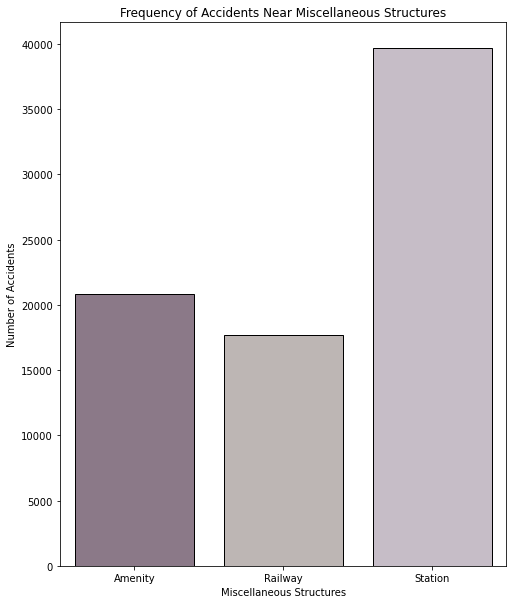

In [76]:
# plotting data from previous cell into a bar graph
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Miscellaneous Structures', y = 'Number of Accidents', data = AmRaSt, palette = muted_earth, edgecolor = 'k')
ax.set_title('Frequency of Accidents Near Miscellaneous Structures');

### Graph 15: Miscellaneous Structures Most Likely to Cause the Most Severe Car Accidents

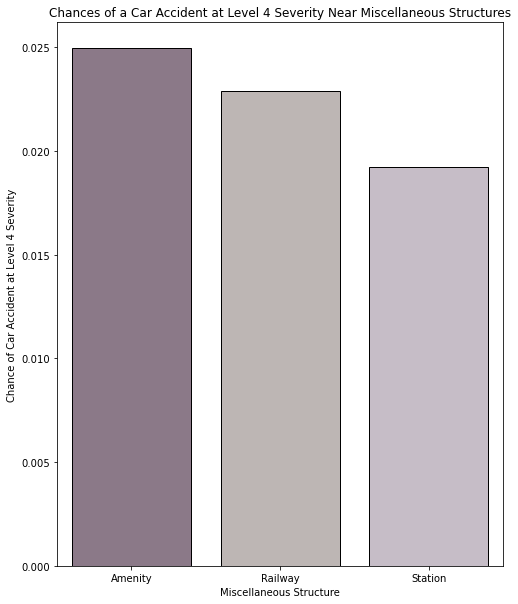

In [77]:
# creating dataframe containing 'Amenity', 'Railway', 'Station', and 'Severity'
AmEnSe = CleanAcc[['Amenity', 'Railway', 'Station', 'Severity']]


# counting frequency of level 4 severity near an amenity
AmEnSe_Am4 = AmEnSe[(AmEnSe['Amenity'] == True) & (AmEnSe['Severity'] == 4)]

# counting frequency of level 4 severity near an railway
AmEnSe_Ra4 = AmEnSe[(AmEnSe['Railway'] == True) & (AmEnSe['Severity'] == 4)]

# counting frequency of level 4 severity near an station
AmEnSe_St4 = AmEnSe[(AmEnSe['Station'] == True) & (AmEnSe['Severity'] == 4)]


# finding chances of level 4 severity near an amenity
AmEnSe_Am4_ch = len(AmEnSe_Am4)/len(AmEn_Tr)

# finding chances of level 4 severity near a railway
AmEnSe_Ra4_ch = len(AmEnSe_Ra4)/len(RaWa_Tr)

# finding chances of level 4 severity near a station
AmEnSe_St4_ch = len(AmEnSe_St4)/len(StTi_Tr)


# creating dataframe containing chances of level 4 severity near miscellaenous structures
AmEnSe_ch_data = {'Miscellaneous Structure':  ['Amenity', 'Railway', 'Station'], 
                 'Chance of Car Accident at Level 4 Severity': [AmEnSe_Am4_ch, AmEnSe_Ra4_ch, AmEnSe_St4_ch]}
AmEnSe_ch = pd.DataFrame(data = AmEnSe_ch_data, columns = ['Miscellaneous Structure', 'Chance of Car Accident at Level 4 Severity'])


# plotting data from previous cell into bar chart
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Miscellaneous Structure', y = 'Chance of Car Accident at Level 4 Severity', data = AmEnSe_ch, palette = muted_earth, edgecolor = 'k')
ax.set_title('Chances of a Car Accident at Level 4 Severity Near Miscellaneous Structures');

## Methodology 10: Sunrise & Sunset
In this methodology, I will be utilizing data from the 'Sunrise_Sunset' and 'Severity' columns to determine the impact of sunrise and sunset with regards to driving conditions.

### Graph 16: Frequency of Car Accidents by Period of Day (based on Sunrise & Sunset)

In [78]:
# creating dataframe containing 'Sunrise_Sunset'
SuSu = CleanAcc[['Sunrise_Sunset', 'Severity']]
SuSu

,Sunrise_Sunset,Severity
5,Day,3
9,Day,3
11,Day,3
14,Day,2
20,Day,2
...,...,...
4232536,Day,2
4232537,Day,2
4232538,Day,2
4232539,Day,2


In [79]:
# counting frequency of 'Day'
SuSu_Da = SuSu[SuSu['Sunrise_Sunset'] == 'Day']
len(SuSu_Da)

1256611

In [80]:
# counting frequency of 'Night'
SuSu_Ni = SuSu[SuSu['Sunrise_Sunset'] == 'Night']
len(SuSu_Ni)

689890

In [81]:
# creating dataframe containing frequencies of car accidents during the day and at night
SuSu_AF_data = {'Sunrise/Sunset':  ['Day', 'Night'], 
                 'Number of Accidents': [len(SuSu_Da), len(SuSu_Ni)]}
SuSu_AF = pd.DataFrame(data = SuSu_AF_data, columns = ['Sunrise/Sunset', 'Number of Accidents'])

SuSu_AF

,Sunrise/Sunset,Number of Accidents
0,Day,1256611
1,Night,689890


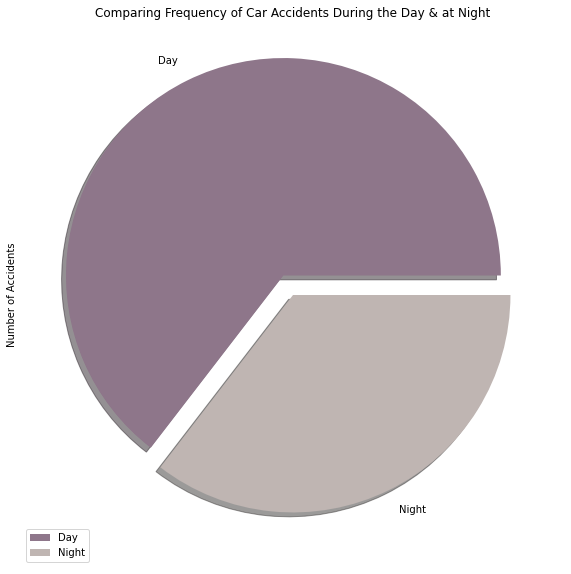

In [82]:
# pie chart comparing frequencies of car accidents during the day and at night
labels = ['Day', 'Night']
explode = (0.1, 0)

ax = SuSu_AF.plot(kind = 'pie', y = 'Number of Accidents', labels = labels, figsize = (10, 10), explode = explode, 
             shadow = True, colors = muted_earth)
ax.set_title('Comparing Frequency of Car Accidents During the Day & at Night');

### Graph 17: Periods of Day (based on Sunrise & Sunset) Most Likely to Cause the Most Severe Car Accidents

In [83]:
# creating dataframe containing 'Sunrise_Sunset' and 'Severity'
SuSuSe = CleanAcc[['Sunrise_Sunset', 'Severity']]
SuSuSe

,Sunrise_Sunset,Severity
5,Day,3
9,Day,3
11,Day,3
14,Day,2
20,Day,2
...,...,...
4232536,Day,2
4232537,Day,2
4232538,Day,2
4232539,Day,2


In [84]:
# counting frequency of level 4 severity during the day
SuSuSe_Da4 = SuSu_Da[SuSu_Da['Severity'] == 4]
print(len(SuSuSe_Da4))

31528


In [85]:
# counting frequency of level 4 severity during the night
SuSuSe_Ni4 = SuSu_Ni[SuSu_Ni['Severity'] == 4]
len(SuSuSe_Ni4)

21321

In [86]:
# finding chances of level 4 severity during the day and at night
SuSuSe_Da4_ch = len(SuSuSe_Da4)/len(SuSu_Da)
print(SuSuSe_Da4_ch)

SuSuSe_Ni4_ch = len(SuSuSe_Ni4)/len(SuSu_Ni)
print(SuSuSe_Ni4_ch)

0.025089705565206736
0.030904926872399947


In [87]:
# creating dataframe containing frequencies of car accidents during the day and at night
SuSu_AS_data = {'Sunrise/Sunset':  ['Day', 'Night'], 
                 'Chance of Level 4 Severity': [SuSuSe_Da4_ch, SuSuSe_Ni4_ch]}
SuSu_AS = pd.DataFrame(data = SuSu_AS_data, columns = ['Sunrise/Sunset', 'Chance of Level 4 Severity'])

SuSu_AS

,Sunrise/Sunset,Chance of Level 4 Severity
0,Day,0.025090
1,Night,0.030905


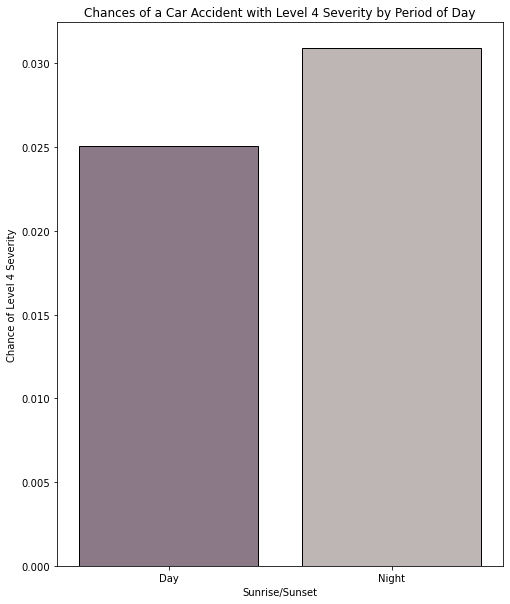

In [88]:
# plotting data from previous cell into bar chart
fig, ax = plt.subplots(figsize = (8, 10))
sns.barplot(x = 'Sunrise/Sunset', y = 'Chance of Level 4 Severity', data = SuSu_AS, palette = muted_earth, edgecolor = 'k')
ax.set_title('Chances of a Car Accident with Level 4 Severity by Period of Day');